In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA (Explainatory Data Analysis)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Phân loại các thuộc tính:
#### Thuộc tính định lượng:
- PassengerId: Số thứ tự của người trên tàu
- Age: Tuổi của người trên tàu
- Fare: Giá vé
#### Thuộc tính định tính:
- Name: Tên của người trên tàu
- Sex: Giới tính
- Pclass: Khoang hạng trên tàu
- Parch: Số lượng cha mẹ và trẻ em trên tàu
- SibSp: Số lượng anh chị em và vợ chồng trên tàu
- Ticket: Số vé tàu
- Cabin: Số cabin
- Embarked: Cảng mà lên đường (C = Cherbourg, Q = Queenstown, S = Southampton)

Drop PassengerId column and Convert to right dtypes

In [8]:
train_df = train_df.drop('PassengerId', axis=1)
test_df = test_df.drop('PassengerId', axis=1)

In [9]:
def convert_to_category(df):
    cols = ['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']
    for i in cols:
        df[i] = df[i].astype('category')

convert_to_category(train_df)
convert_to_category(test_df)

In [10]:
num_cols = ['Age', 'Fare']
cat_cols = ['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']

### Phân tích thuộc tính Categorical với Survived
#### Name

In [11]:
train_df['Name'].nunique()

891

Ta thấy `Name` là thuộc tính unique nên ta có thể drop khỏi tập dữ liệu, vì có thể sẽ mang nhiều ý nghĩa cho phân tích. 

In [12]:
train_df = train_df.drop('Name', axis=1)
test_df = test_df.drop('Name', axis=1)

In [13]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


#### Cabin

In [14]:
print(f"Số lượng dữ liệu khuyết thiếu của Cabin trên tập train: {train_df['Cabin'].isna().sum()}")
print(f"Tỷ lệ so với tập dữ liệu: {train_df['Cabin'].isna().sum()/len(train_df): .2f}%")
print(f"Số lượng dữ liệu khuyết thiếu của Cabin trên tập test: {test_df['Cabin'].isna().sum()}")
print(f"Tỷ lệ so với tập dữ liệu: {test_df['Cabin'].isna().sum()/len(test_df): .2f}%")

Số lượng dữ liệu khuyết thiếu của Cabin trên tập train: 687
Tỷ lệ so với tập dữ liệu:  0.77%
Số lượng dữ liệu khuyết thiếu của Cabin trên tập test: 327
Tỷ lệ so với tập dữ liệu:  0.78%


Số lượng dữ liệu khuyết thiếu của `Cabin` quá lớn so với tập dữ liệu train và test, nên ta sẽ drop khỏi tập dữ liệu.

In [15]:
train_df = train_df.drop('Cabin', axis=1)
test_df = test_df.drop('Cabin', axis=1)

#### Ticket

In [16]:
print(f"Số lượng unique của vé tàu trên tập train: {train_df['Ticket'].nunique()}")
print(f"Tỷ lệ: {train_df['Ticket'].nunique()/len(train_df): .2f}%")
print(f"Số lượng unique của vé tàu trên tập test: {test_df['Ticket'].nunique()}")
print(f"Tỷ lệ: {test_df['Ticket'].nunique()/len(test_df): .2f}%")

Số lượng unique của vé tàu trên tập train: 681
Tỷ lệ:  0.76%
Số lượng unique của vé tàu trên tập test: 363
Tỷ lệ:  0.87%


Ta thấy `Ticket` là thuộc tính unique nên ta có thể drop khỏi tập dữ liệu, vì có thể sẽ mang nhiều ý nghĩa cho phân tích.

In [17]:
train_df = train_df.drop('Ticket', axis=1)
test_df = test_df.drop('Ticket', axis=1)

#### Sex

In [18]:
print(train_df['Sex'].value_counts())
print(train_df['Sex'].value_counts(normalize=True))

male      577
female    314
Name: Sex, dtype: int64
male      0.647587
female    0.352413
Name: Sex, dtype: float64


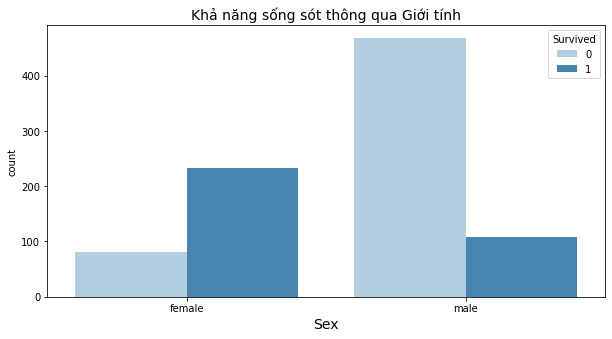

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data = train_df, x = 'Sex', hue = 'Survived', palette='Blues')
plt.title("Khả năng sống sót thông qua Giới tính", fontsize = 14)
plt.xlabel("Sex", fontsize=14);

- Số lượng Nam giới trên tàu nhiều hơn Nữ giới, chiếm 64% số lượng người ở trên tàu.
- Nữ giới có tỷ lệ sống sót nhiều hơn Nam giới.

#### Pclass

In [29]:
print(train_df['Pclass'].value_counts())
print(train_df['Pclass'].value_counts(normalize=True))

3    491
1    216
2    184
Name: Pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


Text(0.5, 0, 'Pclass')

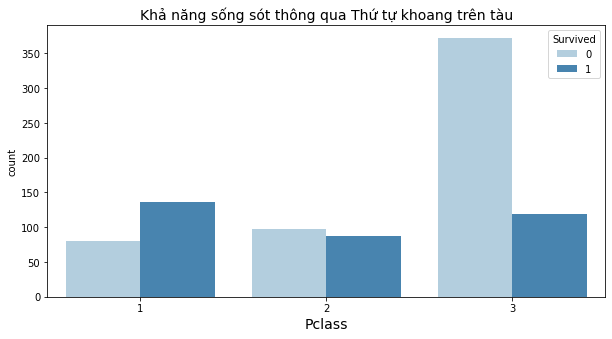

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data = train_df, x = 'Pclass', hue = 'Survived', palette='Blues')
plt.title("Khả năng sống sót thông qua Thứ tự khoang trên tàu", fontsize = 14)
plt.xlabel("Pclass", fontsize=14);

- Số lượng người trên tàu ở khoang hạng 3 đông nhất, khoang hạng 1 thấp nhất
- Người ở khoang hạng nhất thì có cơ hội sống sót cao và số lượng tử vong thấp nhất so với 2 khoang ở dưới.
- Người ở khoang thấp nhất là khoang số 3 thì có số lượng người tử vong cao nhất.

#### Embarked

In [32]:
print(train_df['Embarked'].value_counts())
print(train_df['Embarked'].value_counts(normalize=True))

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64


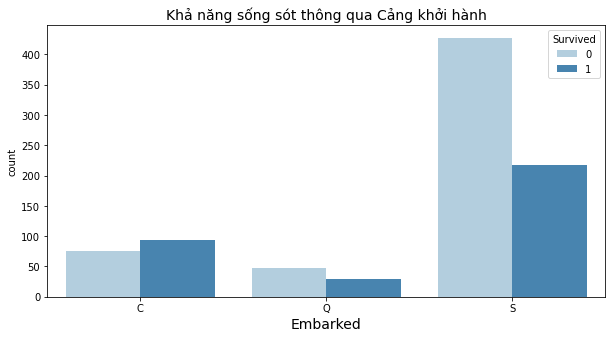

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data = train_df, x = 'Embarked', hue = 'Survived', palette='Blues')
plt.title("Khả năng sống sót thông qua Cảng khởi hành", fontsize = 14)
plt.xlabel("Embarked", fontsize=14);

Ta thấy: 
- Hành khách khởi hành tại cảng Southampton cao nhất, tỷ lệ người sống sót và tử vong cũng cao nhất. 
- Các hành khách khởi hành tại Cherbourg và Queenstown chỉ chiếm tỷ lệ nhỏ trong số lượng hành khách trên tàu. 
- Queenstown có số lượng người sống sót và tử vong thấp nhất.

#### SibSp

In [35]:
print(train_df['SibSp'].value_counts())
print(train_df['SibSp'].value_counts(normalize=True))

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64


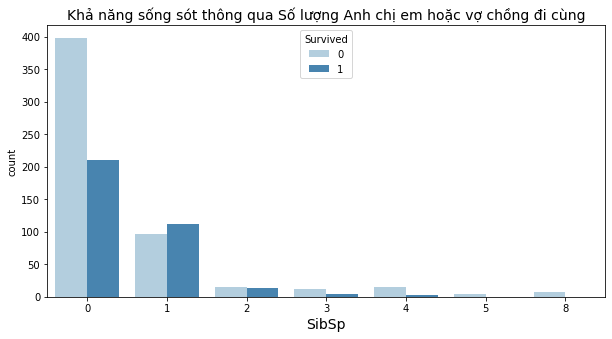

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data = train_df, x = 'SibSp', hue = 'Survived', palette='Blues')
plt.title("Khả năng sống sót thông qua Số lượng Anh chị em hoặc vợ chồng đi cùng", fontsize = 14)
plt.xlabel("SibSp", fontsize=14);

In [36]:
train_df['SibSp_groups'] = pd.cut(train_df['SibSp'], bins=[-1, 0, 3, 5, 11], labels = ['Solo', 'Small', 'Medium', 'Large'])
test_df['SibSp_groups'] = pd.cut(test_df['SibSp'], bins=[-1, 0, 3, 5, 11], labels = ['Solo', 'Small', 'Medium', 'Large'])

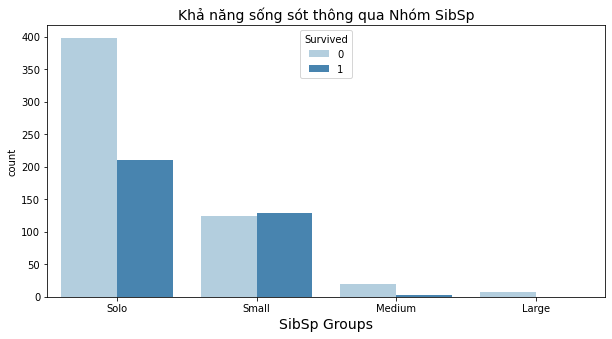

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data = train_df, x = 'SibSp_groups', hue = 'Survived', palette='Blues')
plt.title("Khả năng sống sót thông qua Nhóm SibSp", fontsize = 14)
plt.xlabel("SibSp Groups", fontsize=14);

- Hầu hết hành khách có số lượng anh chị em hoặc vợ chồng đi cùng rất ít. Chủ yếu là đi một mình.
- Số lượng SibSp từ 1 - 3, có số lượng khách hàng sống sót nhỉnh hơn so với số lượng hành khách tử vong
- Hành khách đi một mình thì tử vong cao hơn sống sót.

#### Parch

In [39]:
print(train_df['Parch'].value_counts())
print(train_df['Parch'].value_counts(normalize=True))

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64
0    0.760943
1    0.132435
2    0.089787
3    0.005612
5    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64


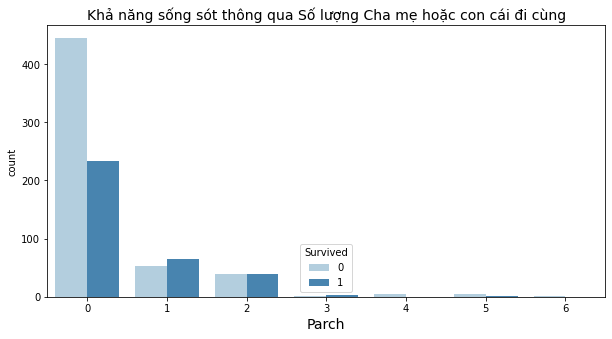

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(data = train_df, x = 'Parch', hue = 'Survived', palette='Blues')
plt.title("Khả năng sống sót thông qua Số lượng Cha mẹ hoặc con cái đi cùng", fontsize = 14)
plt.xlabel("Parch", fontsize=14);

In [41]:
train_df['Parch_groups'] = pd.cut(train_df['Parch'], bins=[-1, 0, 3, 5, 11], labels = ['Solo', 'Small', 'Medium', 'Large'])
test_df['Parch_groups'] = pd.cut(test_df['Parch'], bins=[-1, 0, 3, 5, 11], labels = ['Solo', 'Small', 'Medium', 'Large'])

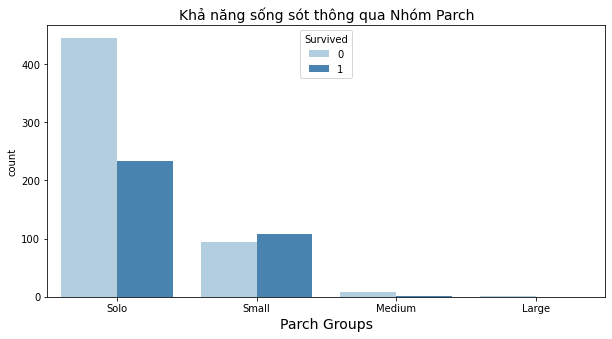

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(data = train_df, x = 'Parch_groups', hue = 'Survived', palette='Blues')
plt.title("Khả năng sống sót thông qua Nhóm Parch", fontsize = 14)
plt.xlabel("Parch Groups", fontsize=14);

Cũng giống như SibSp:
- Số lượng hành khách đi một mình chiếm tỷ lệ cao nhất.
- Số lượng hành khách đi một mình tử vong cũng như sống sót cao.
- Số lượng hành khách đi cùng với cha mẹ hoặc con cái từ 1 đến 3, số lượng sống sót nhỉnh hơn số lượng tử vong.

Kiểm định xem 2 thuộc tính này có tương quan với nhau không?

In [43]:
from scipy import stats
from scipy.stats import chi2_contingency

In [44]:
crosstab = pd.crosstab(train_df['SibSp'], train_df['Parch'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"pvalue: {p}")

pvalue: 1.7902298345649077e-51


#### Hai thuộc tính có mối quan hệ tương quan với nhau. Ta sẽ kết hợp 2 thuộc tính này.

In [45]:
train_df['Family_size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
test_df['Family_size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [46]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SibSp_groups,Parch_groups,Family_size
0,0,3,male,22.0,1,0,7.2500,S,Small,Solo,2
1,1,1,female,38.0,1,0,71.2833,C,Small,Solo,2
2,1,3,female,26.0,0,0,7.9250,S,Solo,Solo,1
3,1,1,female,35.0,1,0,53.1000,S,Small,Solo,2
4,0,3,male,35.0,0,0,8.0500,S,Solo,Solo,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Solo,Solo,1
887,1,1,female,19.0,0,0,30.0000,S,Solo,Solo,1
888,0,3,female,NaN,1,2,23.4500,S,Small,Small,4
889,1,1,male,26.0,0,0,30.0000,C,Solo,Solo,1


In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    category
 2   Sex           891 non-null    category
 3   Age           714 non-null    float64 
 4   SibSp         891 non-null    category
 5   Parch         891 non-null    category
 6   Fare          891 non-null    float64 
 7   Embarked      889 non-null    category
 8   SibSp_groups  891 non-null    category
 9   Parch_groups  891 non-null    category
 10  Family_size   891 non-null    int32   
dtypes: category(7), float64(2), int32(1), int64(1)
memory usage: 32.1 KB


### Phân tích thuộc tính định lượng

#### Age

In [48]:
train_df['Age'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


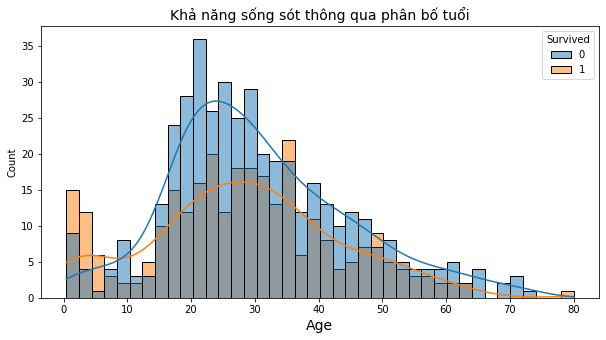

In [50]:
plt.figure(figsize=(10,5))
sns.histplot(data=train_df, x='Age', bins=40, hue='Survived', kde=True)
plt.title("Khả năng sống sót thông qua phân bố tuổi", fontsize=14)
plt.xlabel("Age", fontsize=14);

- Độ tuổi trải dài tới 80 tuổi cao nhất.
- Độ tuổi tập trung nhất vào khoảng từ 18 tuổi đến 38 tuổi, kể cả sống sót hay tử vong.
- Trẻ em có tỷ lệ sống sót cao hơn tử vong.
- Số người tử vong cao nhất là người trong độ tuổi 18 - 25 tuổi.

#### Fare

In [51]:
train_df['Fare'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


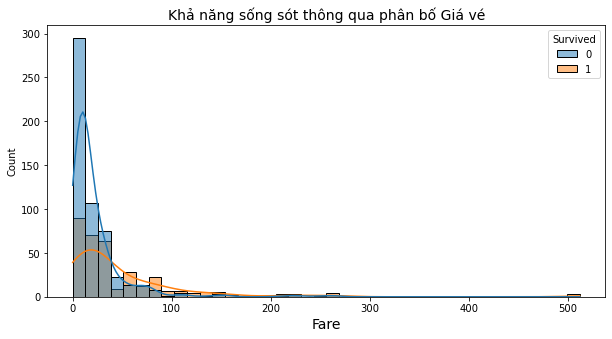

In [52]:
plt.figure(figsize=(10,5))
sns.histplot(data=train_df, x='Fare', bins=40, hue='Survived', kde=True)
plt.title("Khả năng sống sót thông qua phân bố Giá vé", fontsize=14)
plt.xlabel("Fare", fontsize=14);

In [53]:
train_df['Fare_groups'] = pd.qcut(train_df['Fare'], q = 4, labels = ['Cheap', 'Economic', 'Expensive', 'Luxury'])
test_df['Fare_groups'] = pd.qcut(test_df['Fare'], q = 4, labels = ['Cheap', 'Economic', 'Expensive', 'Luxury'])

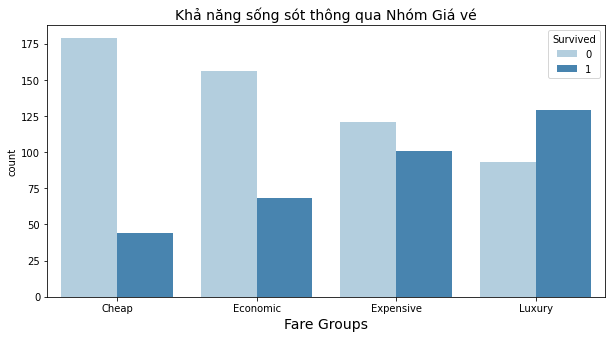

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_df, x='Fare_groups', hue='Survived', palette='Blues')
plt.title("Khả năng sống sót thông qua Nhóm Giá vé", fontsize=14)
plt.xlabel("Fare Groups", fontsize=14);

- Giá vé trung bình là 32, giá vé tập trung từ 7.9 đến 31.
- Giá vé thấp nhất là 0, có thể của các thủy thủ hoặc những người phục vụ trên tàu.
- Giá vé cao nhất là 512, những hành khách này sống sót.
- Những hành khách trả tiền cho vé tàu cao có tỷ lệ sống sót cao, ngược lại là những hành khách có giá vé rẻ và phổ thông có tỷ lệ tử vong cao hơn tỷ lệ sống sót.

In [55]:
def check_null_values(df):
    for i in df.columns:
        null_counts = df[i].isna().sum()
        if null_counts > 0:
            pct = null_counts / len(df)
            print(f"{i} has {pct : .2f} % missing value")
check_null_values(train_df)
check_null_values(test_df)

Age has  0.20 % missing value
Embarked has  0.00 % missing value
Age has  0.21 % missing value
Fare has  0.00 % missing value
Fare_groups has  0.00 % missing value


### Xử lí dữ liệu khuyết thiếu:
- Cột Age: thay bằng giá trị trung vị
- Cột Embarked: thay giá trị mode
- Cột Fare: thay trung vị

In [56]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [57]:
x = test_df['Fare'].values.reshape(-1,1)
impute = SimpleImputer(missing_values = np.nan, strategy='median')
impute.fit(x)
test_df['Fare'] = impute.transform(test_df['Fare'].values.reshape(-1,1))

In [58]:
train_df['Embarked'] = train_df['Embarked'].fillna("S")

In [59]:
check_null_values(train_df)
check_null_values(test_df)

Fare_groups has  0.00 % missing value


In [60]:
test_df['Fare_groups'] = pd.qcut(test_df['Fare'], q = 4, labels = ['Cheap', 'Economic', 'Expensive', 'Luxury'])

### Xử lí giá trị ngoại lai

<AxesSubplot:>

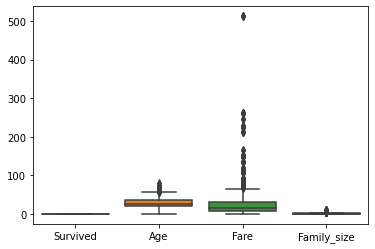

In [61]:
sns.boxplot(data=train_df)

<AxesSubplot:>

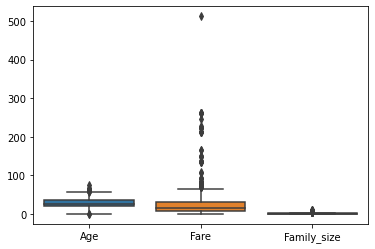

In [62]:
sns.boxplot(data=test_df)

In [63]:
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
Q3 + 1.5*IQR

65.6344

In [64]:
train_df = train_df[(train_df['Fare'] > Q1 - 1.5*IQR) & (train_df['Fare'] < Q3 + 1.5*IQR)]
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SibSp_groups,Parch_groups,Family_size,Fare_groups
0,0,3,male,22.0,1,0,7.2500,S,Small,Solo,2,Cheap
2,1,3,female,26.0,0,0,7.9250,S,Solo,Solo,1,Economic
3,1,1,female,35.0,1,0,53.1000,S,Small,Solo,2,Luxury
4,0,3,male,35.0,0,0,8.0500,S,Solo,Solo,1,Economic
5,0,3,male,25.0,0,0,8.4583,Q,Solo,Solo,1,Economic
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Solo,Solo,1,Economic
887,1,1,female,19.0,0,0,30.0000,S,Solo,Solo,1,Expensive
888,0,3,female,21.5,1,2,23.4500,S,Small,Small,4,Expensive
889,1,1,male,26.0,0,0,30.0000,C,Solo,Solo,1,Expensive


## Xây dựng mô hình dự đoán dựa trên các thuộc tính:
- Numerical: Age, Fare
- Categorical: Pclass, Sex, Embarked, Family_size
- Output: Survived

In [65]:
new_train_df = train_df[['Age', 'Fare', 'Pclass', 'Sex', 'Embarked', 'Family_size']]
new_test_df = test_df[['Age', 'Fare', 'Pclass', 'Sex', 'Embarked', 'Family_size']]

#### Chuyển dữ liệu category thành các biến giả

In [66]:
X = pd.get_dummies(new_train_df)
X.head()

,Age,Fare,Family_size,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,2,0,0,1,0,1,0,0,1
2,26.0,7.9250,1,0,0,1,1,0,0,0,1
3,35.0,53.1000,2,1,0,0,1,0,0,0,1
4,35.0,8.0500,1,0,0,1,0,1,0,0,1
5,25.0,8.4583,1,0,0,1,0,1,0,1,0


#### Sử dụng StandardScaler để co dữ liệu lại

In [67]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.49150234, -0.77911707,  0.1567387 , ..., -0.41955247,
        -0.32732684,  0.57188705],
       [-0.18516261, -0.7293725 , -0.54949673, ..., -0.41955247,
        -0.32732684,  0.57188705],
       [ 0.5041018 ,  2.59982835,  0.1567387 , ..., -0.41955247,
        -0.32732684,  0.57188705],
       ...,
       [-0.52979481,  0.41475242,  1.56920958, ..., -0.41955247,
        -0.32732684,  0.57188705],
       [-0.18516261,  0.89745891, -0.54949673, ...,  2.38349208,
        -0.32732684, -1.74859704],
       [ 0.274347  , -0.74226924, -0.54949673, ..., -0.41955247,
         3.05505046, -1.74859704]])

In [68]:
y = train_df['Survived']
y

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 775, dtype: int64

#### Chia X và y thành tập train và validation theo tỷ lệ 80:20

In [69]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

#### Chạy mô hình Logistic Regression

In [70]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression()

#### Đánh giá mô hình

In [71]:
logistic.score(x_train, y_train)

0.8048387096774193

In [72]:
logistic.score(x_val, y_val)

0.7935483870967742

In [73]:
y_pred = logistic.predict(x_val)

In [74]:
print(f"Độ dự đoán chính xác của mô hình: {accuracy_score(y_pred, y_val)}")

Độ dự đoán chính xác của mô hình: 0.7935483870967742


#### Sử dụng mô hình trên tập test

In [75]:
new_test_df

,Age,Fare,Pclass,Sex,Embarked,Family_size
0,34.5,7.8292,3,male,Q,1
1,47.0,7.0000,3,female,S,2
2,62.0,9.6875,2,male,Q,1
3,27.0,8.6625,3,male,S,1
4,22.0,12.2875,3,female,S,3
...,...,...,...,...,...,...
413,24.0,8.0500,3,male,S,1
414,39.0,108.9000,1,female,C,1
415,38.5,7.2500,3,male,S,1
416,24.0,8.0500,3,male,S,1


In [76]:
X_test = pd.get_dummies(new_test_df)
X_test = scaler.transform(X_test)
y_test_pred = logistic.predict(X_test)

In [77]:
new_test_df['Survived_pred'] = y_test_pred

<ipython-input-77-7b5a0413bc9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_df['Survived_pred'] = y_test_pred


In [78]:
new_test_df

,Age,Fare,Pclass,Sex,Embarked,Family_size,Survived_pred
0,34.5,7.8292,3,male,Q,1,0
1,47.0,7.0000,3,female,S,2,0
2,62.0,9.6875,2,male,Q,1,0
3,27.0,8.6625,3,male,S,1,0
4,22.0,12.2875,3,female,S,3,0
...,...,...,...,...,...,...,...
413,24.0,8.0500,3,male,S,1,0
414,39.0,108.9000,1,female,C,1,1
415,38.5,7.2500,3,male,S,1,0
416,24.0,8.0500,3,male,S,1,0


## Lưu mô hình lại

In [81]:
import pickle
model = pickle.dump(logistic, open("logistictitanic.sav", "wb"))